In [1]:
## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("data/stud.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
#Missing Values
df.isnull().sum() #No Missing Values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
#Check Duplicate Records
df.duplicated().sum() #No Duplicate Records

0

In [6]:
#Check number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
#Check num and cat columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#Observe statisstics of numerical data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#Categorical unique values
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())
print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
#Add total_score and average sore
df['total_score']=df['reading_score']+df['writing_score']+df['math_score']
df['avg_score']=df['total_score']/3

#Divide to numerical and categorical features
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']


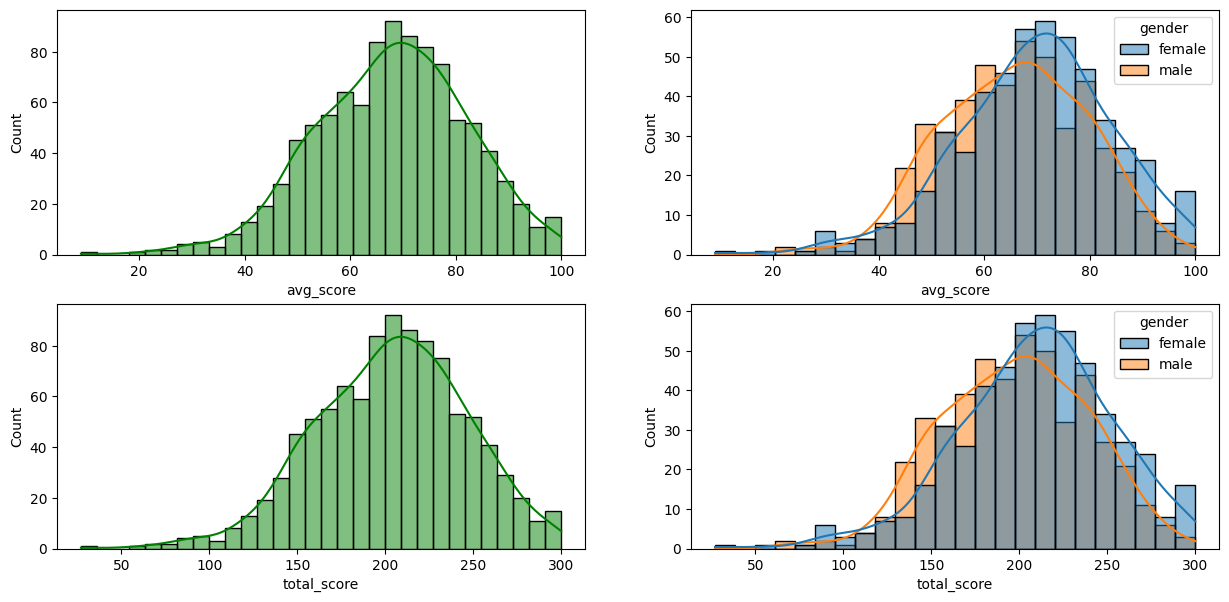

In [11]:
#Analysis
fig,axs=plt.subplots(2,2,figsize=(15,7))
plt.subplot(221)
sns.histplot(df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(222)
sns.histplot(df,x='avg_score',hue='gender',kde=True)
plt.subplot(223)
sns.histplot(df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(224)
sns.histplot(df,x='total_score',hue='gender',kde=True)
plt.show()


###Female students tend to perform well than male students

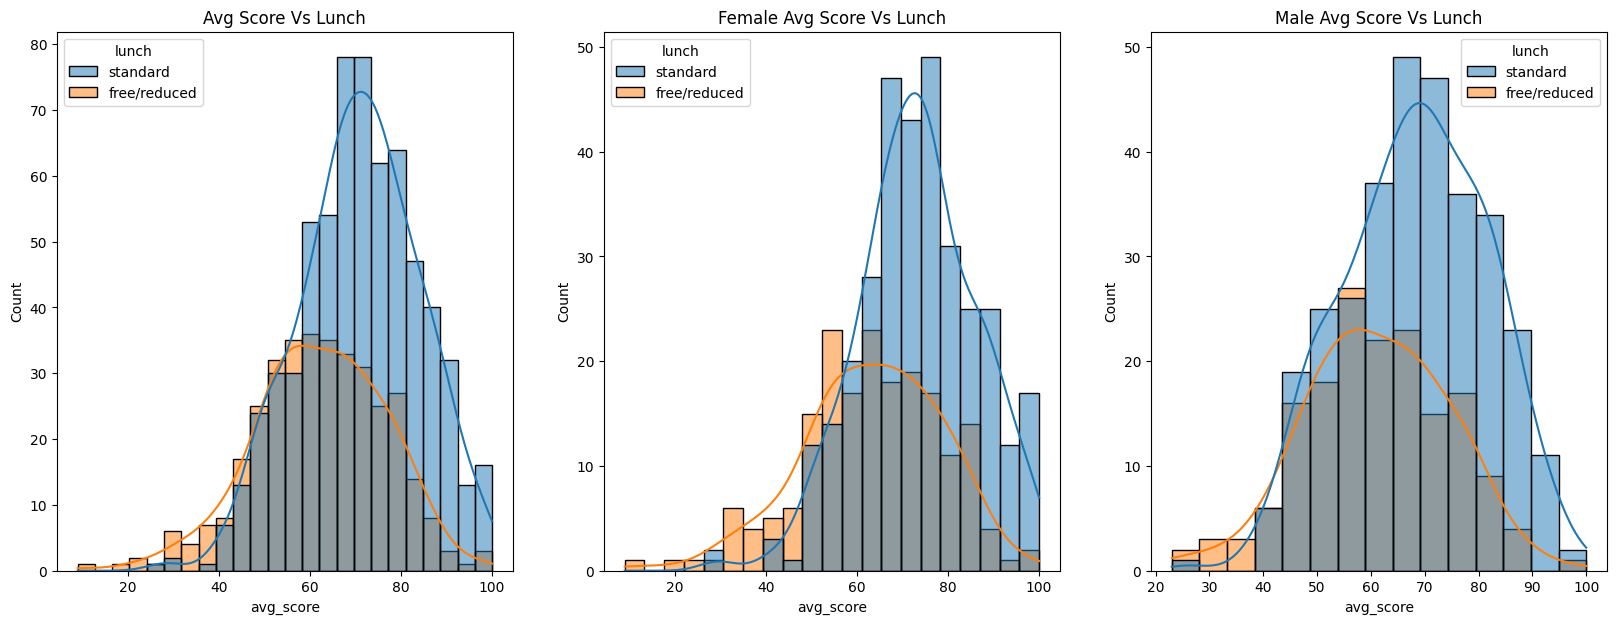

In [12]:
#Check the impact of lunch option
hue_order = df['lunch'].unique()
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
plt.title("Avg Score Vs Lunch")
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch',hue_order=hue_order)
plt.subplot(132)
plt.title("Female Avg Score Vs Lunch")
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch',hue_order=hue_order)
plt.subplot(133)
plt.title("Male Avg Score Vs Lunch")
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch',hue_order=hue_order)
plt.show()

###Standard Lunch option gives good results in both Male and Female

In [13]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

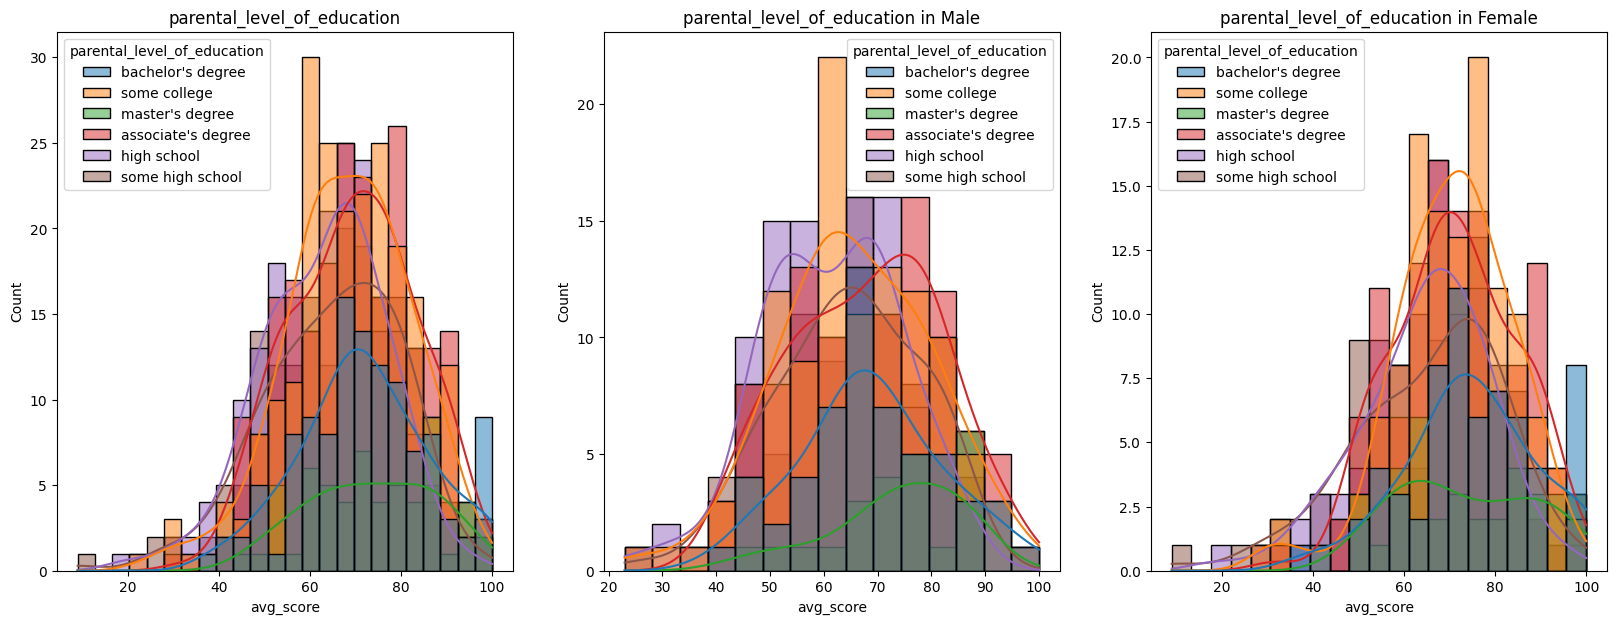

In [14]:
#Check the impact of Parent Education
plt.subplots(1,3,figsize=(20,7))
plt.subplot(131)
plt.title("parental_level_of_education")
sns.histplot(data=df,x='avg_score',hue='parental_level_of_education',kde=True,hue_order=df['parental_level_of_education'].unique())
plt.subplot(132)
plt.title("parental_level_of_education in Male")
sns.histplot(data=df[df['gender']=='male'],kde=True,x='avg_score',hue='parental_level_of_education',hue_order=df['parental_level_of_education'].unique())
plt.subplot(133)
plt.title("parental_level_of_education in Female")
sns.histplot(data=df[df['gender']=='female'],x='avg_score',hue='parental_level_of_education',kde=True,hue_order=df['parental_level_of_education'].unique())
plt.show()



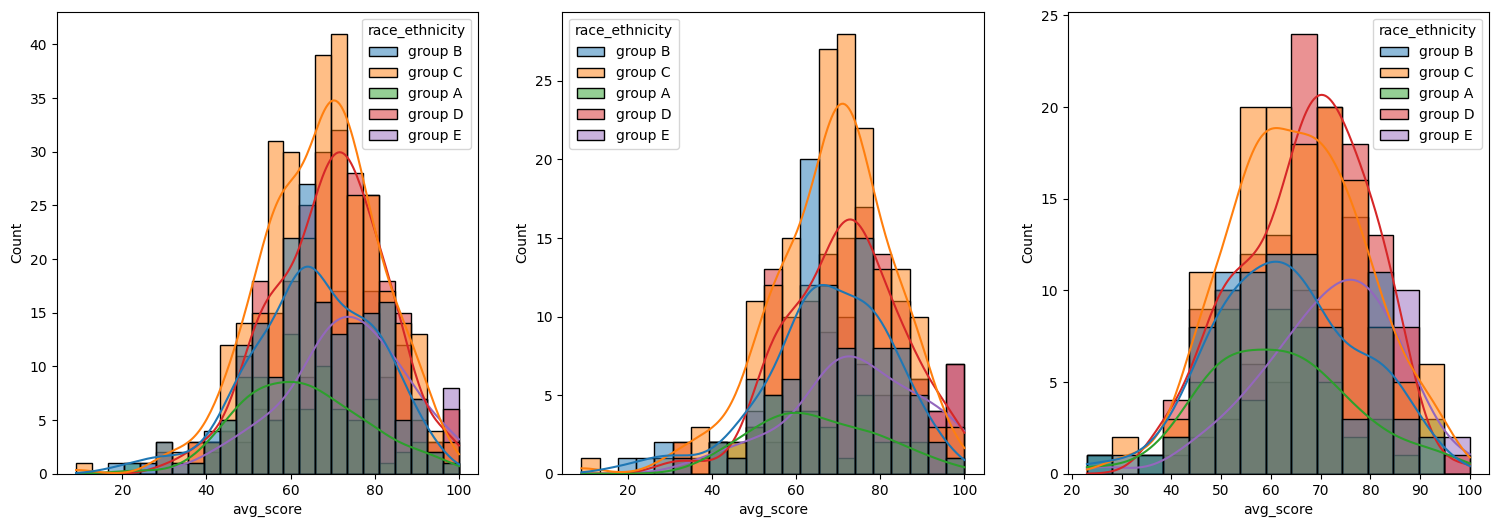

In [18]:
h_order=df['race_ethnicity'].unique()
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='avg_score',kde=True,hue='race_ethnicity',hue_order=h_order)
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity',hue_order=h_order)
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity',hue_order=h_order)
plt.show()

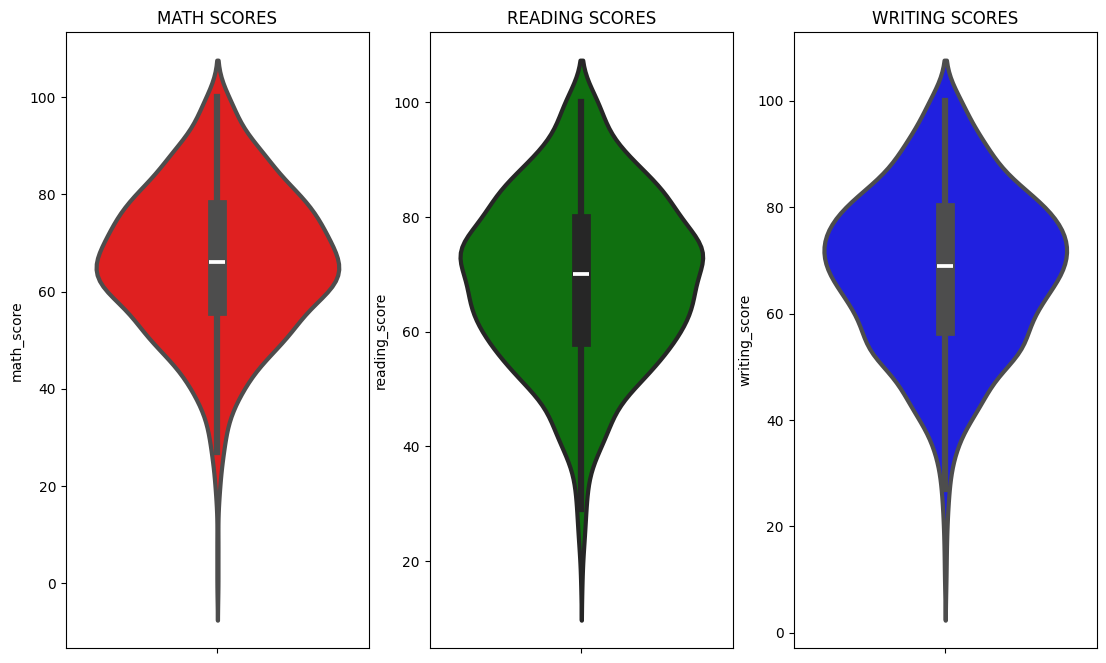

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

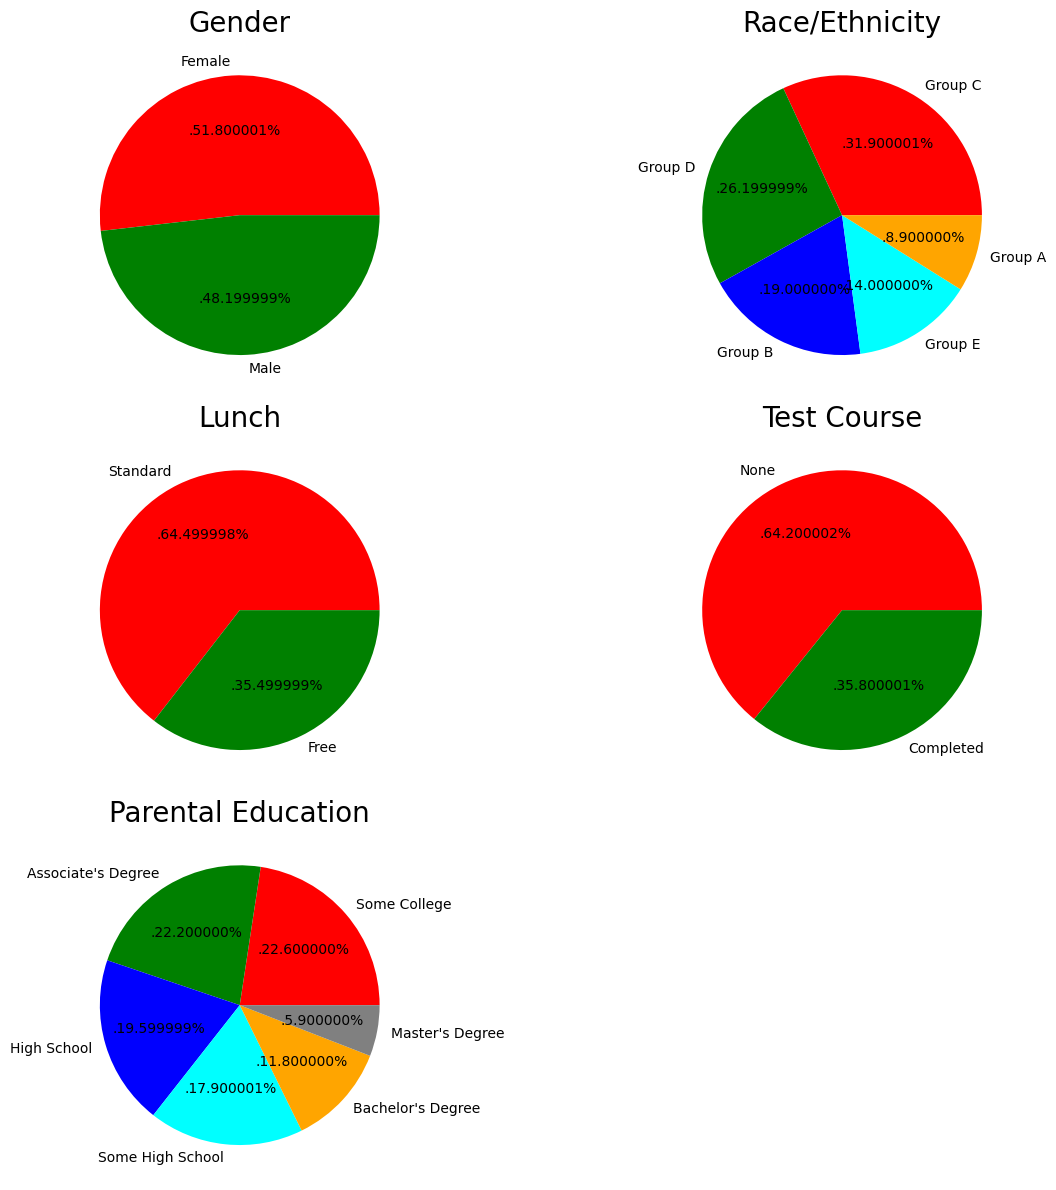

In [25]:
#Multivariate Analysis
plt.rcParams['figure.figsize'] = (12,12)

plt.subplot(3, 2, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(3, 2, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(3, 2, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(3, 2, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(3, 2, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"